# Homework 3
## Optimization via Gradient Descent
In this homework, we want to study methods to solve the general optimization problem where, given a
function $f:ℝ^n→ℝ$, we want to compute:
$$
x^*=\underset{x∈ℝ^n}{\operatorname{argmin}}f(x)
$$
In particular, we will consider the situation where $f(x)$ is at least differentiable, which implies that we can compute its gradient $∇f(x)$.

In this framework, one of the most common way to approach (1) is to use the Gradient Descent (GD)
method, which is an iterative algorithm that, given an initial iterate $x_0 ∈ ℝ^n$ and a positive parameter called step size $α_k > 0$ for each iteration, computes
$$
x_{k+1}=x_k-α_k∇f(x_k)
$$
You are asked to implement the GD method (2) in Python and to test it with some remarkable functions.
Write a script that implement the GD algorithm.

In [ ]:
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import math
import time
from google.colab import drive
import scipy

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def backtracking(f, grad_f, x):
  alpha = 1
  c = 0.8
  tau = 0.25

  while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x)) ** 2:
    alpha = tau * alpha

    if alpha < 1e-3:
      break
  return alpha


def gradient_descent(f, grad_f, x0=[0,0], kmax=100, tolf=1e-5, tolx=1e-5, back = False, alpha = 1e-5):
  if not callable(f) or not callable(grad_f):
    print("Function f and grad_f must be callable objects")
    return

  k = 0

  x = np.zeros((len(x0),kmax))
  x[:,k] = x0

  f_val = np.zeros((kmax))
  f_val[k] = f(x0)

  grads = np.zeros((len(x0),kmax))
  grads[:,k] = grad_f(x0)

  err = np.zeros(kmax)
  err[k] = np.linalg.norm(grad_f(x0))

  stop_criteria_1 = float('inf')   # ||∇f(x_k)|| / ||∇f(x_0)|| < tolf
  stop_criteria_2 = float('inf')   # ||x_k - x_k-1|| < tolx

  # iterations stop when stopping criteria or max num of iterations is reached
  while (stop_criteria_1 >= tolf and stop_criteria_2 >= tolx) and (k < kmax - 1):
    if back:
      alpha = backtracking(f, grad_f, x[:,k])

    x[:,k+1] = x[:,k] - (alpha * grad_f(x[:,k]))
    f_val[k+1] = f(x[:,k+1])
    err[k+1] = np.linalg.norm(grad_f(x[:,k+1]))
    grads[:,k+1] = grad_f(x[:,k+1])

    stop_criteria_1 = np.linalg.norm(grad_f(x[:,k])) / np.linalg.norm(grad_f(x[:,0]))
    stop_criteria_2 = np.linalg.norm(x[:,k+1] - x[:,k], 2)

    k += 1

  return x[:,:k], k, f_val[:k], grads[:,:k], err[:k]



Plotting functions:

In [ ]:
# takes the ouput of the gradient descent algorithm, the function on which it was applied and plot both the gradients descent steps with and without backtracking
def plot_GD(gradient_data_no_back, gradient_data_back, f, title, range_plot=[-10,10]):
    plt.figure(figsize=(12, 4))

    xx, yy = np.meshgrid(np.linspace(range_plot[0], range_plot[1], 100), np.linspace(range_plot[0], range_plot[1], 100))
    zz_plot = f([xx, yy])

    # Subplot 1: GD with no backtracking
    x, k, f_val, grads, err = gradient_data_no_back

    ax1 = plt.subplot(1, 2, 1)
    ax1.plot(x[0, :k], x[1, :k], "--ro")
    ax1.contour(xx, yy, zz_plot)
    plt.title(title + " without backtracking")
    plt.text(0.5, -0.3, f"Iterations = {k+1}\nSolution found: {x[:, -1]}", ha="center", va="center", transform=ax1.transAxes)
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    plt.grid()

    # Subplot 2: GD with backtracking
    x, k, f_val, grads, err = gradient_data_back

    ax2 = plt.subplot(1, 2, 2)
    ax2.plot(x[0, :k], x[1, :k], "--ro")
    ax2.contour(xx, yy, zz_plot)
    plt.title(title + " with backtracking")
    plt.text(0.5, -0.3, f"Iterations = {k+1}\nSolution found: {x[:, -1]}", ha="center", va="center", transform=ax2.transAxes)
    ax2.set_xlabel("x")
    ax2.set_ylabel("y")
    plt.grid()

    plt.show()
    print("\n")


# plot Gradient Descent for x being a 1D array
def plot_GD_1D(gradient_data_no_back, gradient_data_back, f, title, range_plot=[-3,3]):
    plt.figure(figsize=(12, 4))

    x_plot = np.linspace(range_plot[0], range_plot[1], 100)
    y_plot = [f([element]) for element in x_plot]

    # Subplot 1: GD with no backtracking
    x, k, f_val, grads, err = gradient_data_no_back

    ax1 = plt.subplot(1, 2, 1)
    ax1.plot(x_plot,y_plot)
    ax1.plot(x[0,:], f_val,"--ro")
    plt.title(title + " without backtracking")
    plt.text(0.5, -0.3, f"Iterations = {k+1}\nSolution found: {x[:, -1]}", ha="center", va="center", transform=ax1.transAxes)
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")

    # Subplot 2: GD with backtracking
    x, k, f_val, grads, err = gradient_data_back

    ax2 = plt.subplot(1, 2, 2)
    ax2.plot(x_plot,y_plot)
    ax2.plot(x[0,:], f_val,"--ro")
    plt.title(title + " with backtracking")
    plt.text(0.5, -0.3, f"Iterations = {k+1}\nSolution found: {x[:, -1]}", ha="center", va="center", transform=ax2.transAxes)
    ax2.set_xlabel("x")
    ax2.set_ylabel("y")

    plt.show()
    print("\n")


# plot errors in two subplots for several values of alpha
def plot_norm_of_gradient_trend(errors_without_backtracking, errors_with_backtracking, alpha_values):
    n_iterations = [i for i in range(len(errors_with_backtracking[0]))]

    plt.figure(figsize=(12, 4))

    plt1 = plt.subplot(1, 2, 1)
    plt.title("||∇f(x_k)|| with no backtracking")
    plt.xlabel('Iteration')
    plt.ylabel('Gradient')
    plt.grid()

    for i, errors in enumerate(errors_without_backtracking):
        plt.plot(n_iterations, errors, label=f"Alpha = {alpha_values[i]}")

    plt.legend()

    plt2 = plt.subplot(1, 2, 2)
    plt.title("||∇f(x_k)|| with backtracking")
    plt.xlabel('Iteration')
    plt.ylabel('Gradient')
    plt.grid()

    for i, errors in enumerate(errors_with_backtracking):
        plt.plot(n_iterations, errors, label=f"Alpha = {alpha_values[i]}")

    plt.legend()

    plt.show()


# plots absolute error of the
def plot_aproximation_error(gradient_data_no_back, gradient_data_back, true_minimum, kmax = 100):
    x_no_back, k_no_back, f_val, grads, err = gradient_data_no_back
    x_with_back, k_with_back, f_val, grads, err = gradient_data_back

    abs_err_no_back = [math.dist(x_no_back[:, i], true_minimum) for i in range(k_no_back)]
    if len(abs_err_no_back) < kmax:
      abs_err_no_back += ([abs_err_no_back[-1]] * (kmax - len(abs_err_no_back)))

    abs_err_with_back = [math.dist(x_with_back[:, i], true_minimum) for i in range(k_with_back)]
    if len(abs_err_with_back) < kmax:
      abs_err_with_back += ([abs_err_with_back[-1]] * (kmax - len(abs_err_with_back)))

    plt.figure(figsize=(12, 4))
    plt.title("Absolute approximation error")
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.grid()

    titles = ["no backtracking", "backtracking"]
    for i, errors in enumerate([abs_err_no_back, abs_err_with_back]):
        plt.plot(range(1, kmax+1), errors, label=f"{titles[i]}")

    plt.legend()

# plot GD and SGD error and difference between w* and wk
def plot_sgd_errors(n_epochs, err, w):

  plt.figure(figsize=(12, 4))

  x_plot = np.arange(0, n_epochs)
  plt.subplot(1, 2, 1)
  plt.title("Error in SDG")
  plt.plot(x_plot, err)
  plt.xlabel("epochs")
  plt.grid()

  plt.subplot(1, 2, 2)
  plt.title("Difference between Wk and final W*")
  w_star = w[-1]
  diff = [np.linalg.norm(w_star - w[ep, :]) for ep in range(len(w))]
  plt.plot(range(len(w)), diff)
  plt.xlabel("total number of batches")

  plt.grid()
  plt.show()


def plot_gd_errors(err, w):

  plt.figure(figsize=(12, 4))
  x_plot = np.arange(0, len(w))

  plt.subplot(1, 2, 1)
  plt.title("Error in GD")
  plt.plot(x_plot, err)
  plt.xlabel("iterations")
  plt.grid()

  plt.subplot(1, 2, 2)
  plt.title("Difference between Wk and final W*")
  w_star = w[-1]
  diff = [np.linalg.norm(w_star - w[ep, :]) for ep in range(len(w))]
  plt.plot(x_plot, diff)
  plt.xlabel("iterations")
  plt.grid()

  plt.show()

def plot_heatmaps(data_dict1, data_dict2, title1, title2):
    # Convert the nested dictionaries into pandas DataFrames
    df1 = pd.DataFrame(data_dict1).T
    df2 = pd.DataFrame(data_dict2).T

    # global color scale
    vmin = min(df1.min().min(), df2.min().min())
    vmax = max(df1.max().max(), df2.max().max())

    # Create a figure to hold both subplots
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    sns.heatmap(df1, annot=True, cmap='viridis', fmt=".2f", vmin=vmin, vmax=vmax)
    plt.ylabel('Couple of Digits')
    plt.xlabel('Training Size')
    plt.title(title1)

    plt.subplot(1, 2, 2)
    sns.heatmap(df2, annot=True, cmap='viridis', fmt=".2f", vmin=vmin, vmax=vmax)
    plt.ylabel('Couple of Digits')
    plt.xlabel('Training Size')
    plt.title(title2)

    plt.show()

In [ ]:
"""
It takes a function, its grad_function, a set of alpha values to test, and plots GD plot for those alphas in "alpha_to_plot"
(only if possible), in any case, it will plot a comparison (for the same function) of the errors with every possible alpha.
"""
def test_GD(f, grad_f, x0 = [0,0], kmax = 100, tolf = 1e-5, tolx = 1e-5, alpha = [1e-1], alpha_to_plot = [], range_plot=[-10,10], range_plot_f5=[-3,3]):

  gradient_data = {"back": {}, "no_back": {}}  # dictionary containing -> x, k, f_val, grads, err (for backtracking and not backtracking)

  for step_size in alpha:

    gradient_data["no_back"][step_size] = gradient_descent(f, grad_f, x0 = x0, kmax = kmax, tolf = tolf, tolx = tolx, back = False, alpha = step_size)
    gradient_data["back"][step_size] = gradient_descent(f, grad_f, x0 = x0, kmax = kmax, tolf = tolf, tolx = tolx, back = True, alpha = step_size)

    if step_size in alpha_to_plot and (f.__name__ not in ["f3", "f4"]):
      if f.__name__ in ["f1", "f2"]:
        plot_GD(gradient_data["no_back"][step_size], gradient_data["back"][step_size], f, title=f"GD on {f.__name__} / alpha = {step_size}", range_plot = range_plot)
      else:
        plot_GD_1D(gradient_data["no_back"][step_size], gradient_data["back"][step_size], f, title=f"GD on {f.__name__} / alpha = {step_size}", range_plot=range_plot_f5)


  errors_no_back = [gradient_data["no_back"][step_size][-1] for step_size in alpha]
  errors_with_back = [gradient_data["back"][step_size][-1] for step_size in alpha]

  for i in range(len(alpha)):
    len_no_back = len(errors_no_back[i])
    len_with_back = len(errors_with_back[i])

    if len_no_back < kmax:
      errors_no_back[i] = np.append(errors_no_back[i], [errors_no_back[i][-1]] * (kmax-len_no_back))
    if len_with_back < kmax:
      errors_with_back[i] = np.append(errors_with_back[i], [errors_with_back[i][-1]] * (kmax-len_with_back))

  return np.array(errors_no_back), np.array(errors_with_back)


* For each function, run the GD method with and without the backtracking, trying different values for the step size α > 0 when you are not using backtracking. Observe the different behavior of
GD. To help visualization, it is convenient to plot the error vector that contains the
$||∇f(x_k)||_2$, to check
 that it goes to zero.
* Compare the convergence speed (in terms of the number of iterations k) in the
 di erent cases.
 For each of the points above, $x_0= (0,..., 0)^T$, $kmax = 100$, while choose your values for tolf and
 tolx. It is recommended to also plot the error $||x_k-x^*||_2$ varying k when the true x is available.

* Only for the non-convex function *f5*, plot it in the interval [−3, 3] and test the convergence point of GD with different values of $x_0$ and different step-sizes. Observe when the convergence point is the global minimum and when it stops on a local minimum or maximum.

* For the functions 1 and 2, plot the contour around the minimum and the path defined by the iterations (following the example seen during the lesson). See plt.contour to do that.

## Test on $f_1$
The true minimum for $f_1$ is $(3,1)^T$

In [ ]:
def f1(x):
    return (x[0]-3)**2 + (x[1]-1)**2

def grad_f1(x):
    return np.array((2*(x[0] - 3) , 2*(x[1] - 1)))

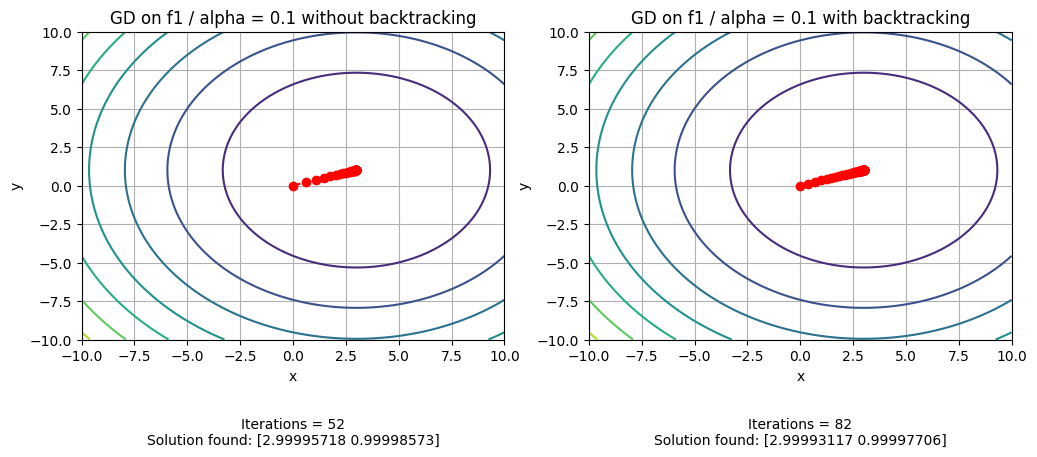

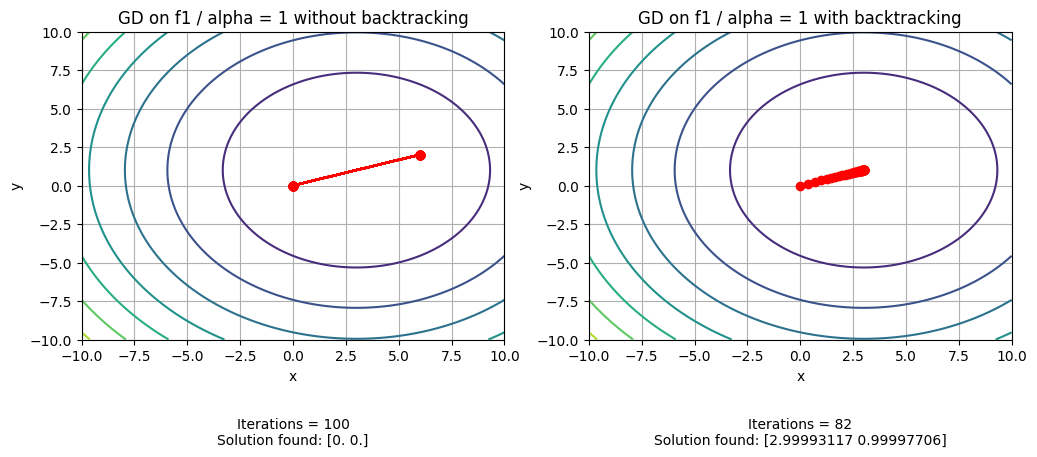

In [ ]:
alpha_to_plot = [1e-1, 1]                           # which learning steps will be included in the contour plot
alpha_to_test = [1e-5, 1e-3, 1e-2, 1e-1, 2e-1, 1]   # which learning steps will be included in the error plot

tolf = 1e-5
tolx = 1e-5

x0 = [0,0]

errors_without_backtracking_f1, errors_with_backtracking_f1 = test_GD(f1, grad_f1, x0 = x0, alpha = alpha_to_test, alpha_to_plot = alpha_to_plot, tolf=tolf, tolx=tolx)


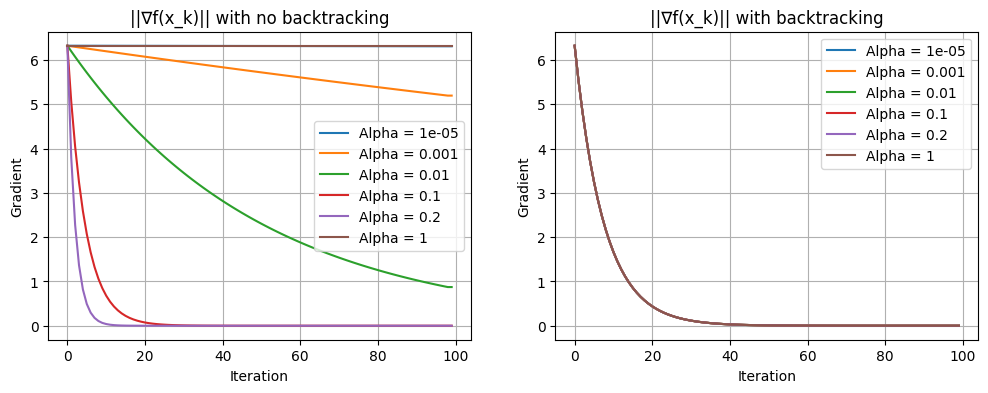

In [ ]:
plot_norm_of_gradient_trend(errors_without_backtracking_f1, errors_with_backtracking_f1, alpha_to_test)

As we can see from these simple tests with $f_1$, by using either a (too) big step size or a (too) small step size, the backtracking is always able to recompute the right value for alpha and reach a good approximation. On the other hand, choosing a good value of alpha without applying backtracking may result in a faster convergence (cons: it may be hard in some problems to manually find a good alpha).

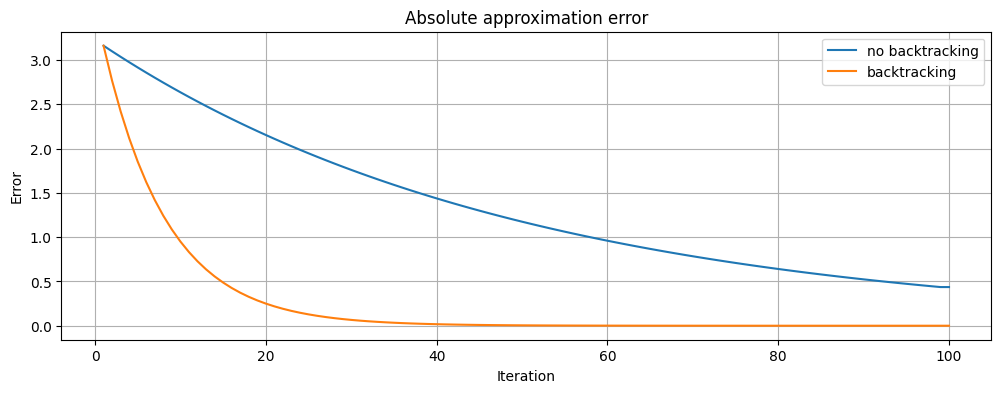

In [ ]:
alpha = 0.01

gd_no_back = gradient_descent(f1, grad_f1, back=False, alpha=alpha)
gd_with_back = gradient_descent(f1, grad_f1, back=True, alpha=alpha)

plot_aproximation_error(gd_no_back, gd_with_back, true_minimum=(3,1))

Even when plotting the absolute error we notice that GD with backtracking is perfectly able to well approximate the true solution (3,1), whereas removing the backtracking and assigning an impropriate alpha value result in a slower (or even bad) approximation.

## Test on f2
The true minimum for $f_2$ is $(1,2)^T$

In [ ]:
def f2(x):
    return 10*(x[0]-1)**2 + (x[1]-2)**2

def grad_f2(x):
    return np.array((20*(x[0] - 1) , 2*(x[1] - 2)))

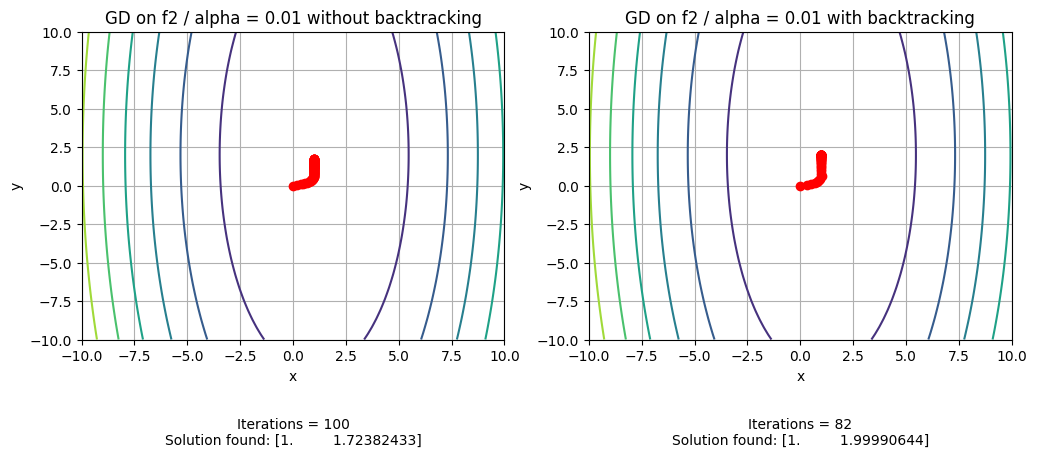

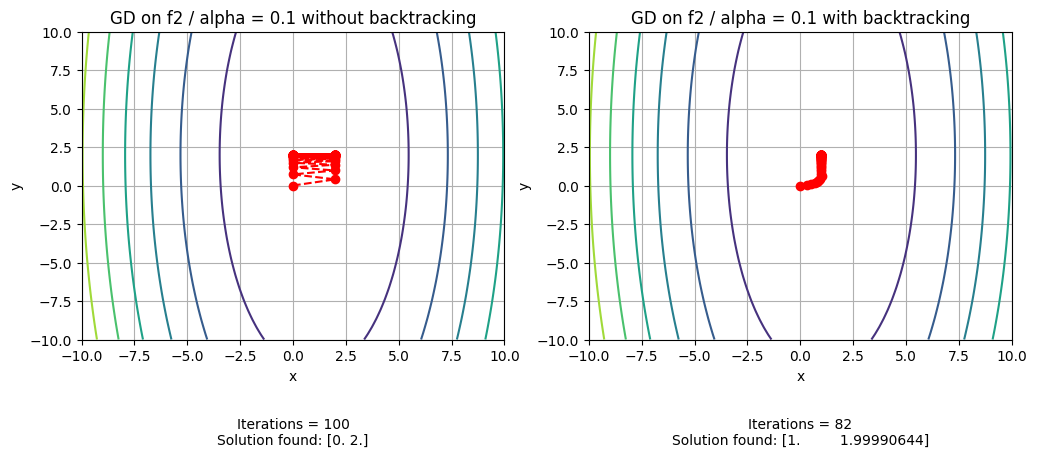

In [ ]:
alpha_to_test = [1e-3, 1e-2, 1e-1]
alpha_to_plot = [1e-2, 1e-1]

tolf = 1e-5
tolx = 1e-5

x0 = [0,0]

errors_without_backtracking_f2, errors_with_backtracking_f2 = test_GD(f2, grad_f2, x0 = x0, alpha = alpha_to_test, alpha_to_plot = alpha_to_plot, tolf=tolf, tolx=tolx)

As we already noticed in $f_1$, by using either a (too) big step size or a (too) small step size, the backtracking is always able to recompute the right value for alpha and reach a good approximation. On the other hand, choosing a good value of alpha without applying backtracking may result in a faster convergence (cons: it may be hard in some problems to manually find a good alpha).

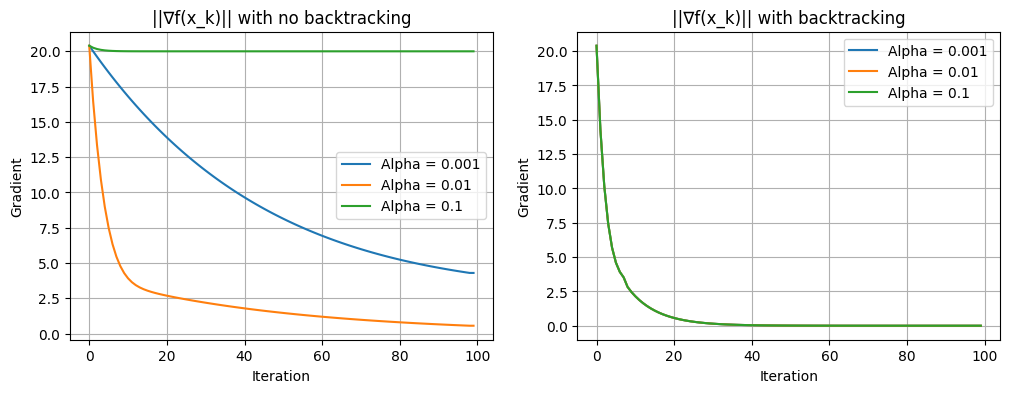

In [ ]:
plot_norm_of_gradient_trend(errors_without_backtracking_f2, errors_with_backtracking_f2, alpha_to_test)

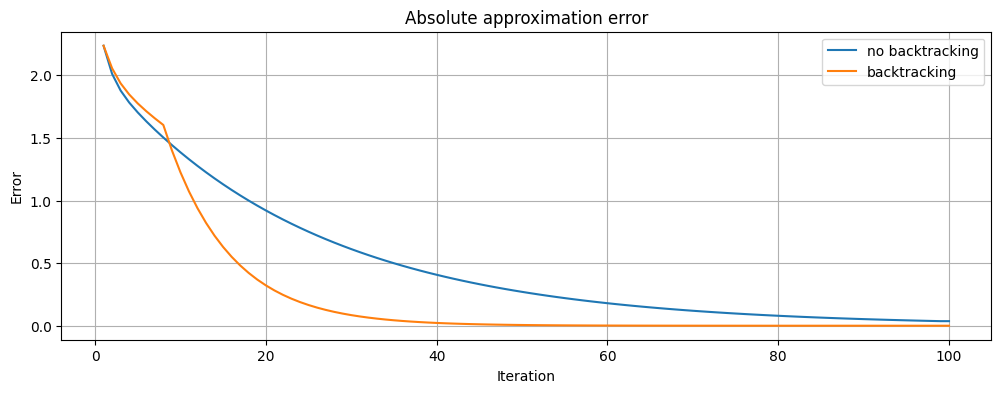

In [ ]:
alpha = 0.02

gd_no_back = gradient_descent(f2, grad_f2, back=False, alpha=alpha)
gd_with_back = gradient_descent(f2, grad_f2, back=True, alpha=alpha)

plot_aproximation_error(gd_no_back, gd_with_back, true_minimum=(1,2))

Even when plotting the absolute error we notice that GD with backtracking is perfectly able to well approximate the true solution (3,1), whereas removing the backtracking and assigning an impropriate alpha value result in a slower (or even bad) approximation.

## Test on f3

In [ ]:
def f3(x):
    n = len(x)
    v = np.linspace(0,1,n)
    A = np.vander(v)
    x_true = np.ones(n).T
    b = A @ x_true
    return (np.linalg.norm((A@x) - b,2)**2) / 2

def grad_f3(x):
    n = len(x)
    v = np.linspace(0,1,n)
    A = np.vander(v)
    x_true = np.ones(n).T
    b = A @ x_true
    return A.T@(A@x-b)

Value of n:  5


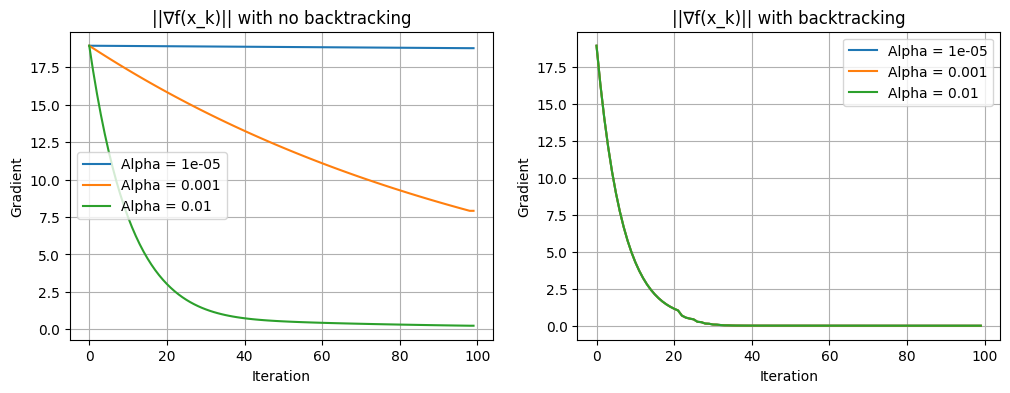


Value of n:  10


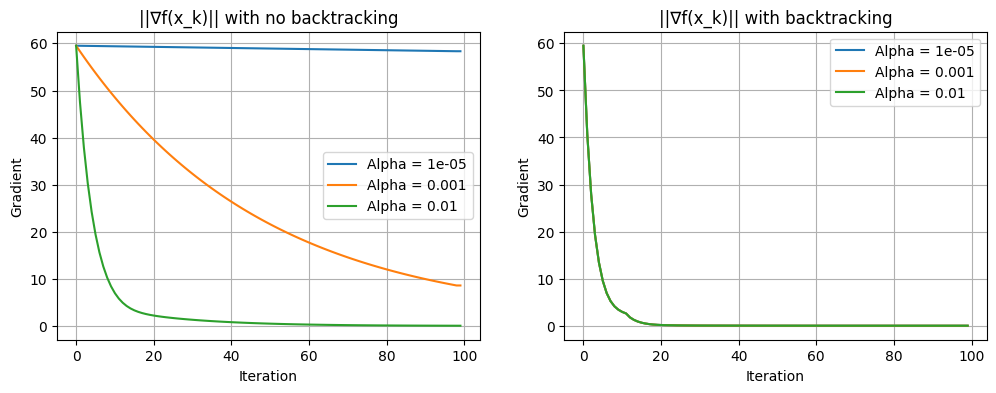


Value of n:  15


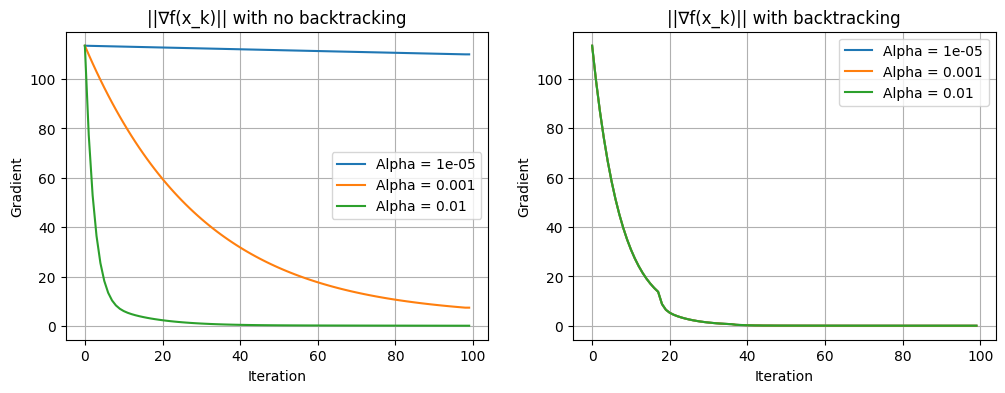


Value of n:  20


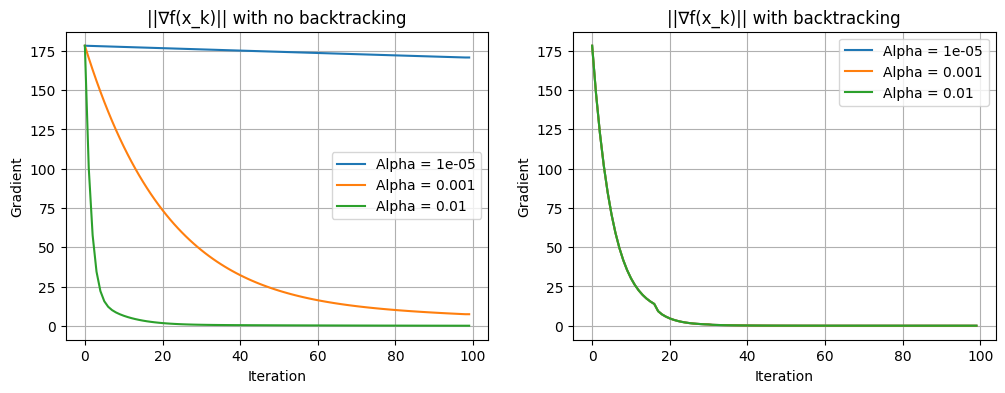

In [ ]:
# alpha = 1e-1, 2e-1 works less for increasing values of n
alpha_to_test = [1e-5, 1e-3, 1e-2]
alpha_to_plot = []

tolf = 1e-5
tolx = 1e-5

n_range = range(5, 25, 5)  # by changin n, it also changes the size of the first iterate

for n in n_range:
  print("Value of n: ", n)
  errors_without_backtracking_f3, errors_with_backtracking_f3 = test_GD(f3, grad_f3, x0 = np.zeros(n), alpha = alpha_to_test, alpha_to_plot = alpha_to_plot, tolf=tolf, tolx=tolx)
  plot_norm_of_gradient_trend(errors_without_backtracking_f3, errors_with_backtracking_f3, alpha_to_test)
  print()

By changing the value of $n$, we increase the complexity of the problem (bigger dimensionality of the optimization problem). The choice of learning rates might be more critical for higher-dimensional problems. A learning rate that works well for lower-dimensional problems may not perform as effectively in higher dimensions and could lead to convergence issues. For example, for $alpha = [1e-5, 1e-3, 1e-2]$ the algorithm still behaves well for all the sizes of $n$ between $5$ and $20$, but when trying with bigger values of alpha. $alpha = [1e-1, 2e-1]$ works well for a small $n$, but it does not suit anymore for values of $n > 10$. This is due to the fact that the problem increased its dimensionality (and complexity), requiring adjustments in the hyperparameters.

## Test on f4

In [ ]:
lambd = 0.5   # lambda in [0,1]

def f4(x):
    n = len(x)
    v = np.linspace(0,1,n)
    A = np.vander(v)
    x_true = np.ones(n).T
    b = A @ x_true
    return (np.linalg.norm((A@x) - b,2)**2) + lambd/2 * (np.linalg.norm(x,2)**2) / 2

def grad_f4(x):
    return grad_f3(x) + lambd*np.array(x)

Lambda = 0


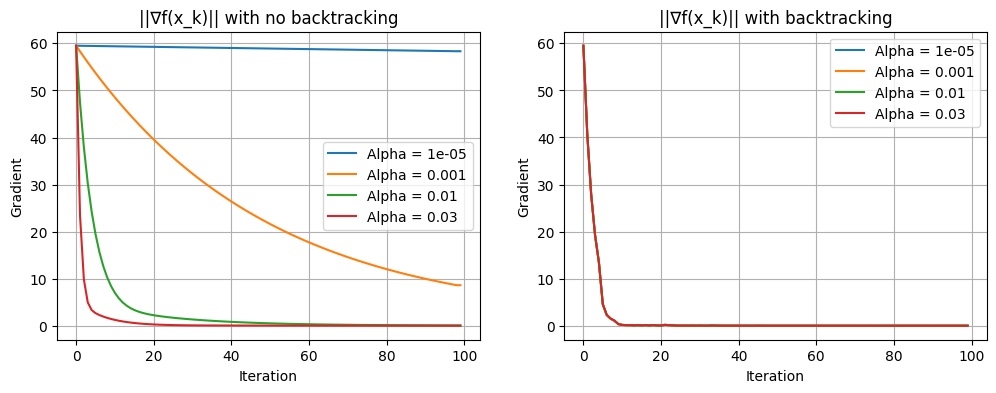


Lambda = 0.3


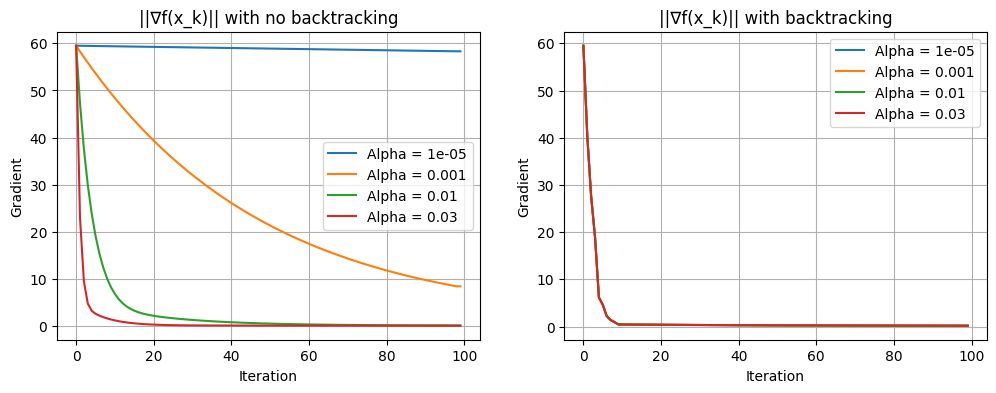


Lambda = 0.6


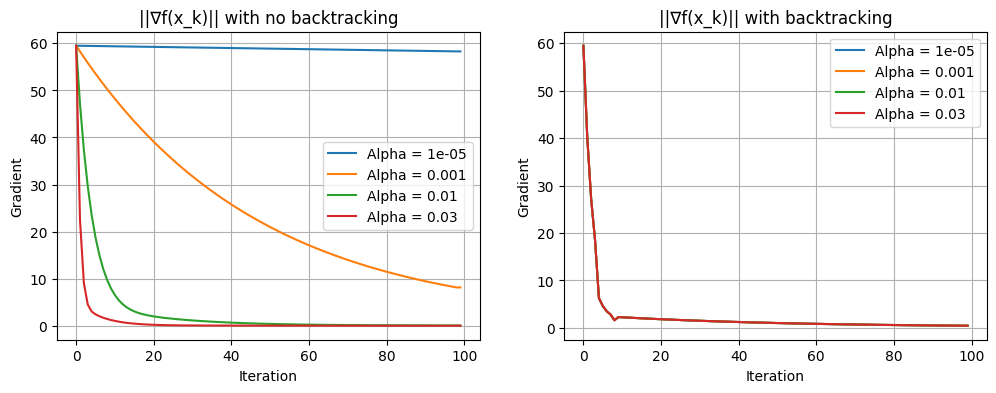


Lambda = 0.8


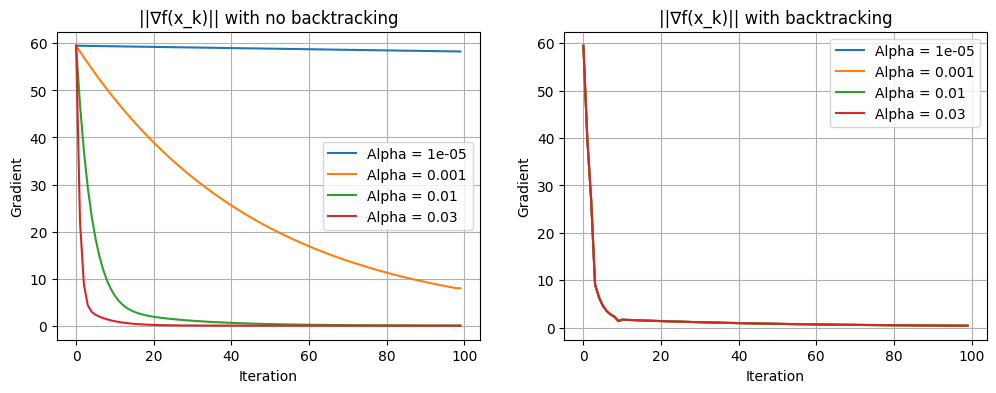


Lambda = 1


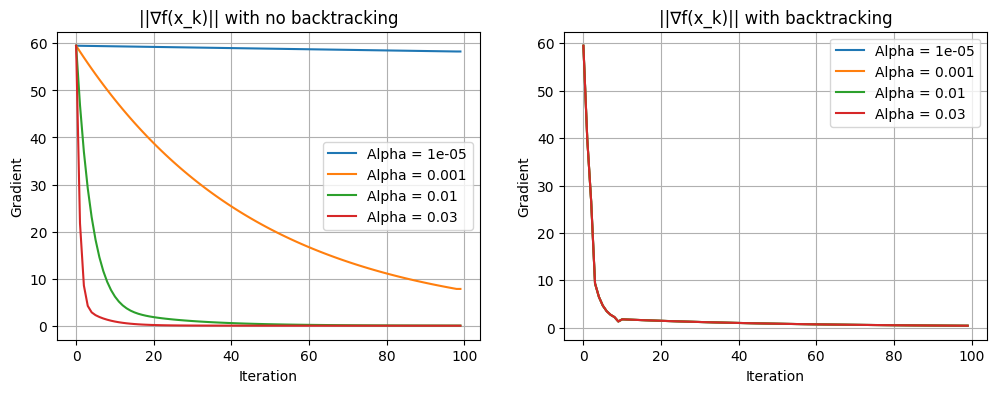

In [ ]:
alpha_to_test = [1e-5, 1e-3, 1e-2, 3e-2]
lambda_to_test = [0, 0.3, 0.6, 0.8, 1]

x0 = np.zeros(10)
tolf = 1e-5
tolx = 1e-5

for lambd in lambda_to_test:
  n = len(x0)
  v = np.linspace(0, 1, n)
  A = np.vander(v)
  x_true = np.ones(n).T
  b = A @ x_true

  f4 = lambda x: (np.linalg.norm((A @ x) - b, 2) ** 2) + lambd / 2 * (np.linalg.norm(x, 2) ** 2) / 2
  grad_f4 = lambda x: grad_f3(x) + lambd * np.array(x)

  print(f"Lambda = {lambd}")
  errors_without_backtracking_f4, errors_with_backtracking_f4 = test_GD(f4, grad_f4, x0 = x0, alpha = alpha_to_test, alpha_to_plot = [], tolf=tolf, tolx=tolx)
  plot_norm_of_gradient_trend(errors_without_backtracking_f4, errors_with_backtracking_f4, alpha_to_test)
  print()

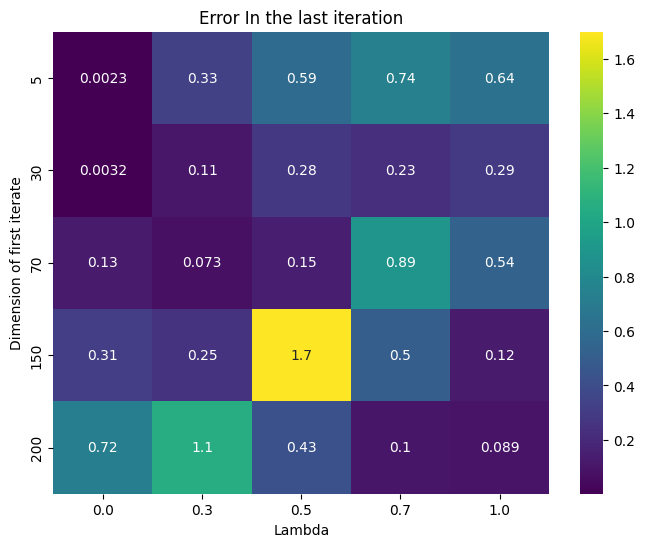

In [ ]:
alpha_to_test = [0.01]
lambda_to_test =  [0, 0.3, 0.5, 0.70, 1]
n_to_test = [5, 30, 70, 150, 200]

errors = {n:{l:0 for l in lambda_to_test} for n in n_to_test}

for n in n_to_test:
  for lambd in lambda_to_test:
    v = np.linspace(0, 1, n)
    A = np.vander(v)
    x_true = np.ones(n).T
    b = A @ x_true

    f4 = lambda x: (np.linalg.norm((A @ x) - b, 2) ** 2) + lambd / 2 * (np.linalg.norm(x, 2) ** 2) / 2
    grad_f4 = lambda x: A.T @ (A @ x - b) + lambd * np.array(x)

    errors[n][lambd] = np.array(test_GD(f4, grad_f4, x0 = np.zeros(n), alpha = alpha_to_test, alpha_to_plot = [], tolf=tolf, tolx=tolx)[1]).flatten()[-1]


# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(errors).T, annot=True, cmap="viridis")  # You can change the colormap if you wish
plt.title("Error In the last iteration")
plt.xlabel("Lambda")
plt.ylabel("Dimension of first iterate")
plt.show()

Finding a good compromise between $n$ and lambda seems to be the best solution, in fact:
- If lambda is small and the complexity is low (top-left of heatmap), we have the best results on average.
- If lambda is high and the complexity is low (top-right of heatmap) the optimization is strongly guided by the regularization term, leading to high errors.
- If lambda is small and the complexity is high (bottom-left of heatmap) the problem becomes complicated and it would need a regularization term.
- If lambda is high and the complexity is high (bottom-right of heatmap) the value of lambda is well compensating the complexity of the problem and the error are kept under control

## Test on f5

In [ ]:
def f5(x):
    return x[0]**4 + x[0]**3 - 2*(x[0]**2) - 2*x[0]

def grad_f5(x):
    return 4*(x[0]**3) + 3* (x[0]**2) - 4*x[0] - 2

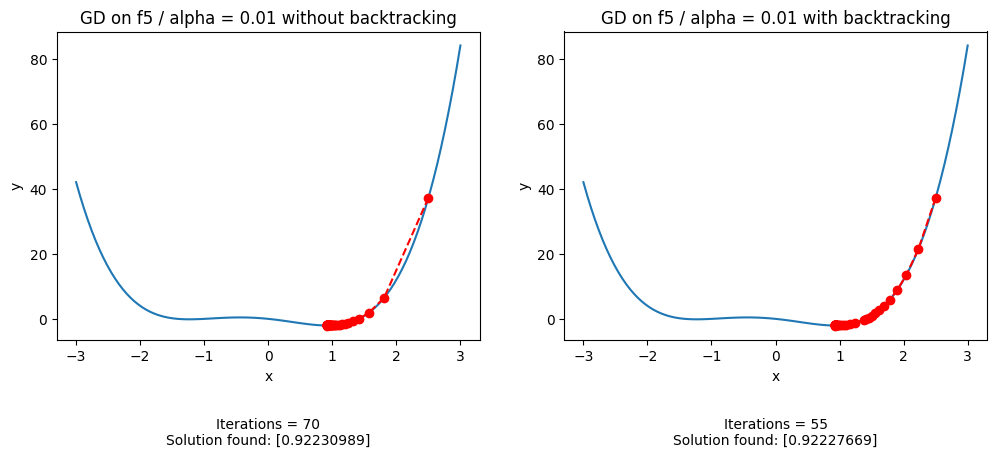

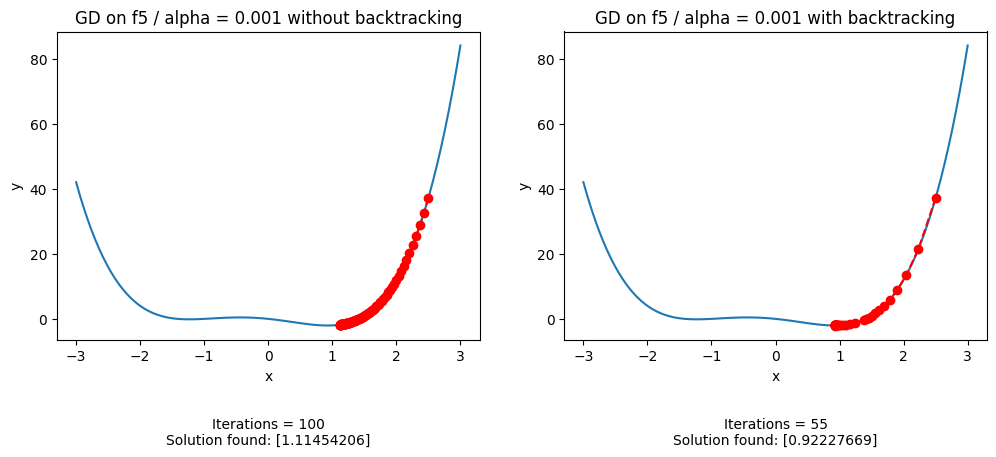

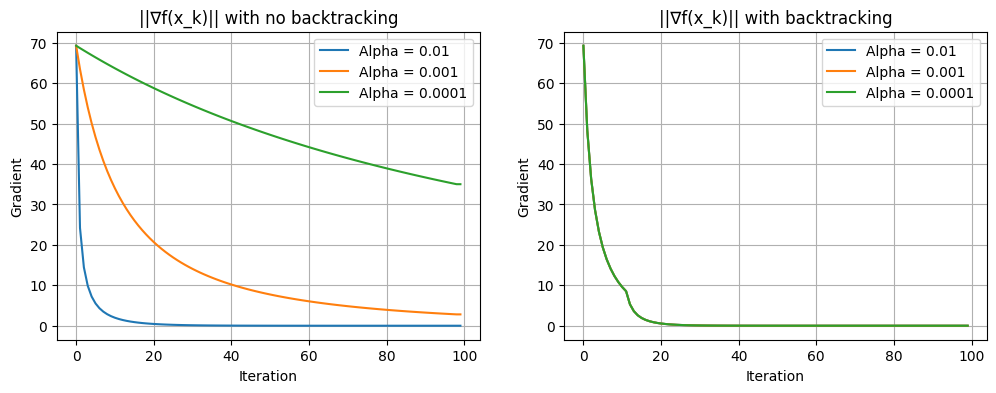

In [ ]:
alpha_to_test = [1e-2, 1e-3, 1e-4]
alpha_to_plot = [1e-2, 1e-3]

tolf = 1e-5
tolx = 1e-5

x0 = 2.5        # between -3 and +3

errors_without_backtracking_f5, errors_with_backtracking_f5 = test_GD(f5, grad_f5, x0 = [x0], kmax=100, alpha = alpha_to_test, alpha_to_plot = alpha_to_plot, tolf=tolf, tolx=tolx, range_plot_f5=[-3,3])
plot_norm_of_gradient_trend(errors_without_backtracking_f5, errors_with_backtracking_f5, alpha_to_test)

## Optimization via Sthochastic Gradient Descent

To test the SGD, consider the MNIST dataset we used in the previous laboratories, and do the following:

  1. From the dataset, select only two digits. It would be great to let the user input the two digits to select.

  2. Do the same operation of the previous homework to obtain the training and test set from $(X, Y )$, selecting the $N_{train}$ you prefer.

  3.  Implement a logistic regression classificator as described in the corresponding post on my website http://www.evangelistadavide.com/

In [ ]:
chosen_labels = [1,2]    # choose your labels

labels__map = {0: chosen_labels[0], 1: chosen_labels[1]}
inverse_labels_map = {chosen_labels[0]: 0, chosen_labels[1]: 1}

mapping = lambda array, map: np.array([map.get(n) for n in array])

In [ ]:
def split_data(X, Y, labels__map=labels__map, inverse_labels_map=inverse_labels_map, division_percentage = 0.5):

    N_train = int(division_percentage*X.shape[1])

    pixels_per_image, images = X.shape
    idx = np.arange(images)
    np.random.shuffle(idx)

    train_idx = idx[0:N_train]
    test_idx = idx[N_train:-1]

    X_train = X[:, train_idx]
    Y_train = mapping(Y[train_idx], inverse_labels_map).reshape((len(Y[train_idx]), 1))

    X_test = X[:, test_idx]
    Y_test = mapping(Y[test_idx], inverse_labels_map).reshape((len(Y[test_idx]), 1))

    # add row of ones to X_train and X_test
    ones_train = np.reshape(np.ones(X_train.shape[1]), (1,-1)) #column of 1s
    ones_test = np.reshape(np.ones(X_test.shape[1]), (1,-1)) #column of 1s

    X_train = np.concatenate((ones_train, X_train), axis = 0)
    X_test = np.concatenate((ones_test, X_test), axis = 0)

    return (X_train, Y_train), (X_test, Y_test)


def retrieve_data(labels):
  data = np.array(pd.read_csv("/content/drive/MyDrive/datasets/homework2SMAAIdata.csv"))

  X = np.transpose(data[:,1:])
  Y = data[:,0]

  X = np.array(X[:,np.isin(Y, labels)])
  Y = np.array([y for y in Y if y in labels])

  return X, Y

In [ ]:
X, Y = retrieve_data(chosen_labels)
(X_train, Y_train), (X_test, Y_test) = split_data(X, Y)

print("X_train shape: ", X_train.shape, "   //    Y_train shape: ", Y_train.shape)
print("\nX_test shape: ", X_test.shape, "   //    Y_test shape: ", Y_test.shape)

X_train shape:  (785, 4430)    //    Y_train shape:  (4430, 1)

X_test shape:  (785, 4430)    //    Y_test shape:  (4430, 1)


In [ ]:
def sigmoid(z):
    return 1/(1 + math.e**(-z))

def fw(x_hat, w):
    return sigmoid(x_hat.T @ w)


# loss function to minimize (MSE)
def l(w, x, y):
  N = x.shape[1]
  return 1/N * np.linalg.norm(fw(x, w) - y, 2)**2

def grad_l(w, x, y):
   N = x.shape[1]
   tmp = np.vectorize(sigmoid)(x.T @ w)
   return 2/N * x @ (tmp  * (1 - tmp) * (tmp - y))

Write a Python script that implement the SGD algorithm, following the structure you already wrote
for GD.

In [ ]:
# returns a list of lists, where each sub list represents the indexes to take from the
# dataset for a certain batch
def get_batch_indexes(batch_size, tot_batch, N):
    batch_indexes = np.arange(N)
    np.random.shuffle(batch_indexes)

    idx = []

    for i in range(0, tot_batch * batch_size, batch_size):
        idx.append(batch_indexes[i:i + batch_size].tolist())

    return idx


def SGD(l, grad_l, w0, D, batch_size, n_epochs, alpha=1e-5, verbose = True):
    X, Y = D
    d, N = X.shape

    n_batch_per_epoch = math.ceil(N/batch_size)
    tot_batches = n_batch_per_epoch * n_epochs

    w = np.array(w0).reshape(-1, 1)
    f_val = np.zeros((n_epochs, ))
    err = np.zeros((n_epochs,))
    grads = np.empty((0, d, 1))
    w_vector = np.empty((0, d, 1))

    if verbose:
      epochs_iterator = tqdm(range(n_epochs), desc="Epoch")
    else:
      epochs_iterator = range(n_epochs)

    for epoch in epochs_iterator:
        batch_indexes = get_batch_indexes(batch_size, tot_batches, N)

        for b in range(n_batch_per_epoch):
            X_batch, Y_batch = X[:, batch_indexes[b]], Y[batch_indexes[b]]

            w = w - alpha * grad_l(w, X_batch, Y_batch)
            w_vector = np.concatenate([w_vector, w[np.newaxis, :, :]], axis=0)


        f_val[epoch] = l(w, X_batch, Y_batch)
        grads = np.concatenate([grads, grad_l(w, X_batch, Y_batch)[np.newaxis, :, :]], axis=0)
        err[epoch] = np.linalg.norm(grad_l(w, X_batch, Y_batch))

    return w_vector, f_val, grads, err

In [ ]:
#modified version of backtracking and gradient descent function (compatible with optimization problems)
def backtracking(f, grad_f, w, X, Y):
    alpha = 1
    c = 0.8
    tau = 0.25

    while f(w - alpha * grad_f(w), X, Y) > f(w, X, Y) - c * alpha * np.linalg.norm(grad_f(w)) ** 2:
        alpha *= tau
        if alpha < 1e-3:
            break

    return alpha

def GD(f, grad_f, w0, D, kmax=100, alpha = 1e-5, tolf=1e-4, tolx=1e-4, back = False):

  X, Y = D
  d, N = X.shape

  k = 0

  w = np.array(w0).reshape(-1, 1)
  f_val = np.zeros((kmax,))
  err = np.zeros((kmax,))
  grads = np.empty((0, d, 1))
  w_vector = np.empty((0, d, 1))

  gadient_zero = grad_l(w0, X, Y)

  stop_criteria_1 = float('inf')   # ||||∇f(x_k)|||| / ||||∇f(x_0)|||| < tolf
  stop_criteria_2 = float('inf')   # ||||x_k - x_k - 1|||| < tolx

  #iterations stop when stopping criteria or max num of iterations is reached
  while (stop_criteria_1 >= tolf and stop_criteria_2 >= tolx) and (k < kmax - 1):
    grad_current = grad_l(w, X, Y)
    last_w = w
    if back:
        alpha = backtracking(l, lambda w: grad_current, w, X, Y)

    w = w - alpha * grad_current
    w_vector = np.concatenate([w_vector, w[np.newaxis, :, :]], axis=0)

    f_val[k] = l(w, X, Y)
    grads = np.concatenate([grads, grad_current[np.newaxis, :, :]], axis=0)
    err[k] = np.linalg.norm(grad_current)

    stop_criteria_1 = np.linalg.norm(grad_l(w, X, Y) / np.linalg.norm(gadient_zero))
    stop_criteria_2 = np.linalg.norm(w - last_w, 2)

    k += 1

  return w_vector, f_val[:k], grads[:k], err[:k], k

In [ ]:
# parameters for SGD
d, N = X_train.shape

batch_size = int(N/20)
n_epochs = 40
w0_interval = 1e-4

alpha = 1e-7

w0 = np.random.uniform(low = -w0_interval, high = w0_interval, size=d)

print(f"SGD: Starting training process with N = {N}, batch size = {batch_size} and {n_epochs} epochs\n")
w_sgd, f_val_sgd, grads_sgd, err_sgd = SGD(l, grad_l, w0, (X_train, Y_train), batch_size, n_epochs, alpha=alpha)
print()

SGD: Starting training process with N = 4430, batch size = 221 and 40 epochs



Epoch: 100%|██████████| 40/40 [00:01<00:00, 24.82it/s]

In [ ]:
kmax=100
alpha = 1e-5
tolf=1e-5
tolx=1e-5
back=False

print(f"GD: Starting training process with N = {N}, kmax = {kmax} and Backtracking = {back} \n")
w_gd, f_val_gd, grads_gd, err_gd, n_iterations = GD(l, grad_l, w0, (X_train, Y_train), kmax=kmax, alpha = alpha, tolf=tolf, tolx=tolx, back=back)

GD: Starting training process with N = 4430, kmax = 100 and Backtracking = False 



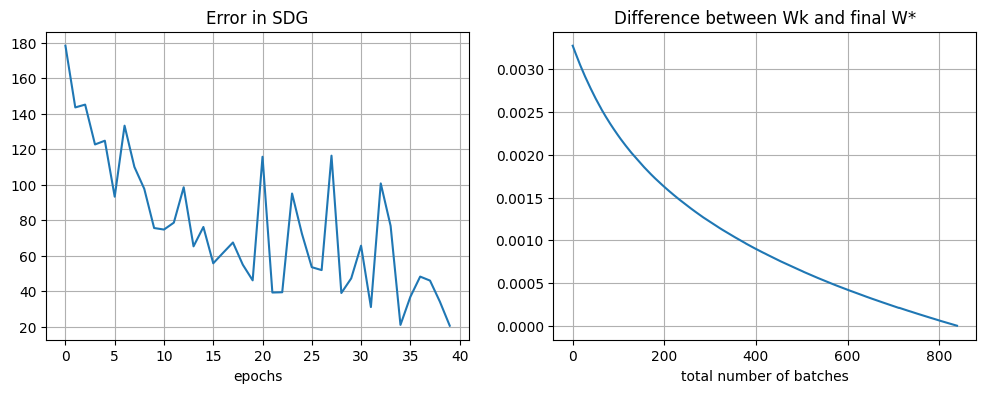

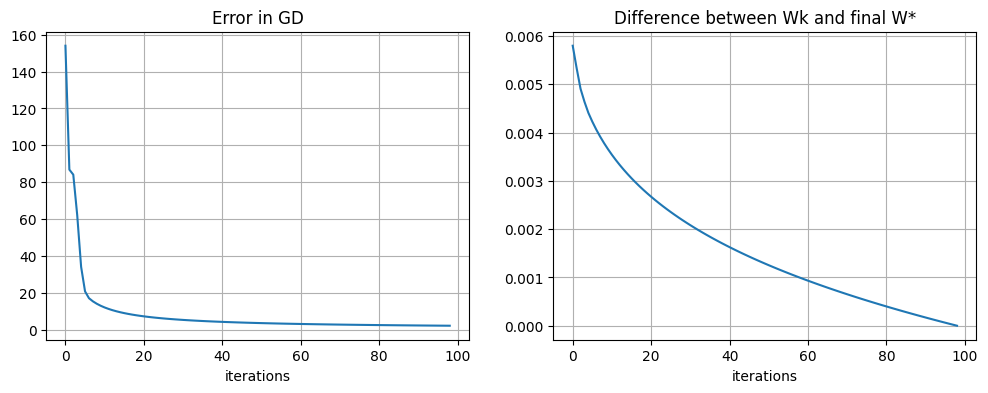

In [ ]:
plot_sgd_errors(n_epochs, err_sgd, w_sgd) # the error is the last one for each epoch, not a mean over the epoch
plot_gd_errors(err_gd, w_gd)

## GD and SGD comparison

* Test the logistic regression classificator for different digits and different training set dimensions.
* The training procedure will end up with a set of optimal parameters $w^∗$. Compare $w^∗$ when computed with Gradient Descent and Stochastic Gradient Descent, for different digits and different training set
dimensions.
* Comment the obtained results (in terms of the accuracy of the learned classificator).

In [ ]:
def predict(w, X, treshold=0.5):
  predictions = np.zeros((X.shape[1], ))
  predictions[fw(X, w)[:,0] > 0.5] = 1
  return predictions

def accuracy(predictions, labels):
  well_predicted = sum([1 if predictions[i] == labels[i] else 0 for i in range(len(predictions))])
  return (well_predicted / len(predictions))*100

In [ ]:
def test_GD_vs_SGD(digits_2_test, training_set_sizes, SGD_parameters, GD_parameters):

  SGD_time = 0
  GD_time = 0

  # every integer in this dictionary of dictionaries represents an accuracy value
  w_GD = {couple_of_digits: {training_size: 0 for training_size in training_set_sizes} for couple_of_digits in digits_2_test}
  w_SGD = {couple_of_digits: {training_size: 0 for training_size in training_set_sizes} for couple_of_digits in digits_2_test}

  total_iterations = len(digits_2_test)*len(training_set_sizes)

  with tqdm(total=total_iterations, desc="Tests") as pbar:
    for couple_of_digits in digits_2_test:

      X, Y = retrieve_data(couple_of_digits)
      for training_size in training_set_sizes:

        labels__map = {0: couple_of_digits[0], 1: couple_of_digits[1]}
        inverse_labels_map = {couple_of_digits[0]: 0, couple_of_digits[1]: 1}

        (X_train, Y_train), (X_test, Y_test) = split_data(X, Y, labels__map, inverse_labels_map, training_size)

        d, N = X_train.shape
        batch_size = int(N/15)

        # accuracy for SGD
        start_time = time.time()
        w, f_val, grads, err = SGD(l, grad_l, w0, (X_train, Y_train), batch_size, SGD_parameters["n_epochs"], SGD_parameters["alpha"], verbose = False)
        SGD_time += time.time() - start_time
        predictions = predict(w[-1], X_test)
        acc = accuracy(predictions, Y_test)
        w_SGD[couple_of_digits][training_size] = acc

        # accuracy for GD
        start_time = time.time()
        w, f_val, grads, err, iterations = GD(l, grad_l, w0, (X_train, Y_train), GD_parameters["kmax"], GD_parameters["alpha"], GD_parameters["tolf"], GD_parameters["tolx"], GD_parameters["back"])
        GD_time += time.time() - start_time
        predictions = predict(w[-1], X_test)
        acc = accuracy(predictions, Y_test)
        w_GD[couple_of_digits][training_size] = acc

        pbar.update(1)

  return w_GD, w_SGD, GD_time, SGD_time

In [ ]:
digits_2_test = [(2, 7), (0, 6), (7, 5), (8,9)]
training_set_sizes = [0.2, 0.5, 0.8]

SGD_parameters = {"n_epochs": 40, "alpha": 1e-5}
GD_parameters = {"kmax": 100, "alpha": 1e-5, "tolf":1e-5, "tolx":1e-5, "back": False}

w_GD, w_SGD, GD_time, SGD_time = test_GD_vs_SGD(digits_2_test, training_set_sizes, SGD_parameters, GD_parameters)

Tests: 100%|██████████| 12/12 [02:17<00:00, 11.49s/it]


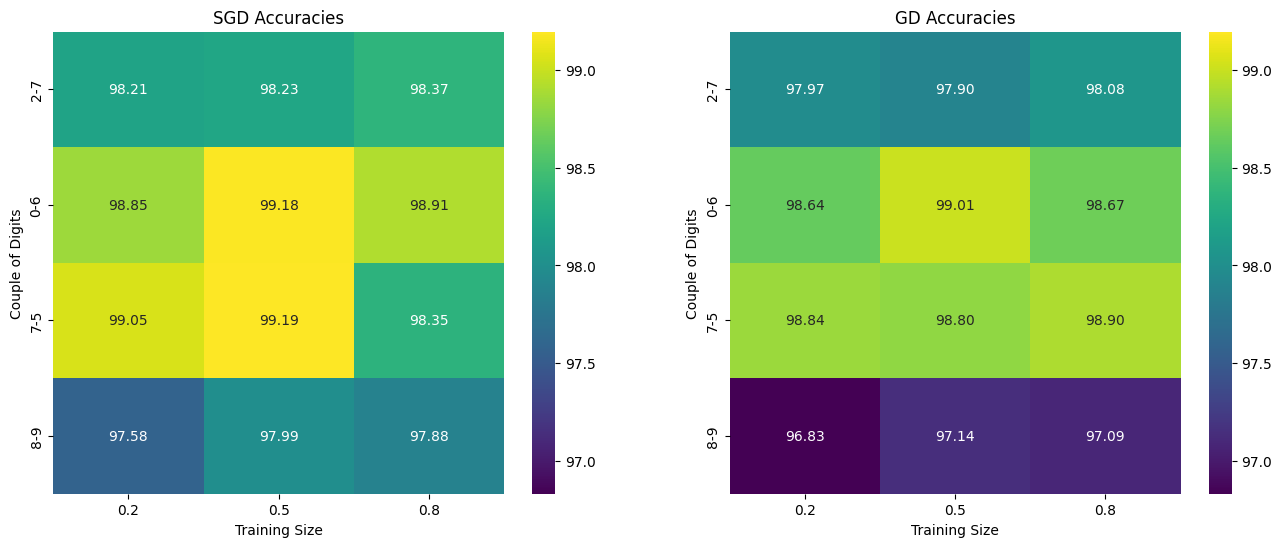

In [ ]:
PRINT_TIME = False

if PRINT_TIME:
  print("Total training time for optimization with SGD: ", SGD_time)
  print("Total training time for optimization with GD (no backtracking, kmax = 100): ", GD_time)
  print()

plot_heatmaps(w_SGD, w_GD, "SGD Accuracies", "GD Accuracies")

These results demonstrate the effectiveness of both SGD and GD (especially with backtracking) in classifying MNIST digits. Here the main observations:

- **Training set size**: models trained on smaller subsets (20% of the dataset) have demonstrated remarkably good performance, achieving accuracies only marginally lower than those trained with larger portions (50%, 75%, 80%). This effectiveness can likely be attributed to the straightforward nature of the task (standard dataset with minimal noise and small-sized images).

- **GD**: on average, the accuracy of GD where very close to the SGD one (sligthly below).

- **SGD**: this optimization method had shorter training times and best performance on average when compared to GD with and without backtracking.

The selection of hyperparameters is crucial, as demonstrated in this study. Under the specific hyperparameters used, SGD showed superior results. However, it's important to note that both SGD and GD have the potential to achieve equally high performance with the right hyperparameter tuning in a straightforward classification problem like this. However, in a more complex scenario the ability of SGD to emulate the work of GD is essential for efficient computability.



### Comparison with PCA/LDA in homework 2